Summary

1. Capumolin and Ramicane appear to have the greatest effect on reducing the size of tumors.
2. There is a positive correlation between tumor size and weight of mice.
3. Capumolin is most effective between roughly 20 days through 35 days.


In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
full_data = full_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites",
                      "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
full_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [3]:
# Checking the number of mice.
mouse_count = full_data["Mouse ID"].value_counts()
number_of_mice = len(mouse_count)
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = full_data.loc[full_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = full_data.loc[full_data["Mouse ID"] == "g989", :]
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = full_data[full_data["Mouse ID"].isin(duplicate_mice)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [7]:
mouse_count = clean_data["Mouse ID"].value_counts()
number_of_mice = len(mouse_count)
number_of_mice

248

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = clean_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = clean_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stddev = clean_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = clean_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

statistics = pd.DataFrame({"Mean Tumor Volume": mean,
                          "Median Tumor Volume": median,
                          "Tumor Volume Variance": variance,
                          "Tumor Volume Std. Dev.": stddev,
                          "Tumor Volume Std. Err.": sem})
statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggregate = clean_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregate
                                                        

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

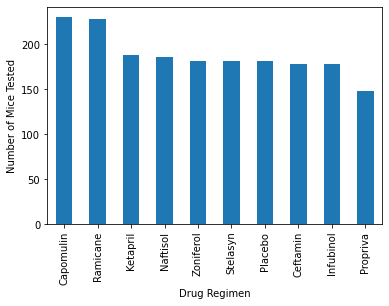

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug reimen
mice_count = clean_data["Drug Regimen"].value_counts()
bar_graph = mice_count.plot.bar()

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()


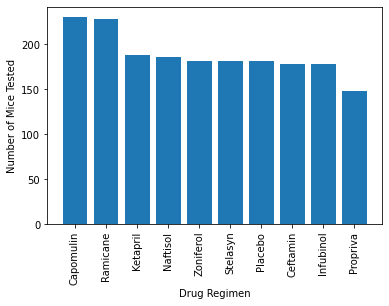

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.show()

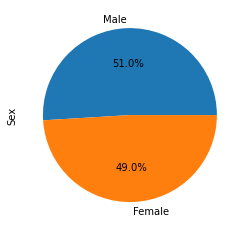

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_data["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

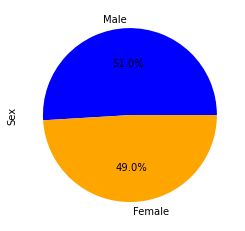

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [.50957, .4904]
colors = ["Blue", "Orange"]
plt.pie(sizes, labels=labels, colors=colors,
       autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
by_mouse = clean_data.groupby(["Mouse ID"]).max()["Timepoint"]
by_mouse_reset = by_mouse.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
full_clean_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(clean_data,on=['Mouse ID','Timepoint'],how="left")
full_clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

def find_outliers(drug):
    regimen_data = full_clean_data.loc[full_clean_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{drug}'s potential outliers:{outliers}")
    return regimen_data

cap = find_outliers("Capomulin")
ram = find_outliers("Ramicane")
inf = find_outliers("Infubinol")
ceft = find_outliers("Ceftamin")



Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


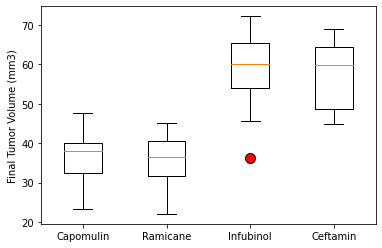

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([cap, ram, inf, ceft], labels=treatments, flierprops={'markersize':10, 'markerfacecolor': 'red'})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

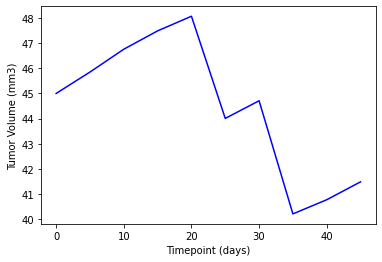

In [97]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = full_data.loc[full_data["Drug Regimen"] == "Capomulin",:]
l509 = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
x_axis = l509["Timepoint"]
y_axis = l509["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, color="blue")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

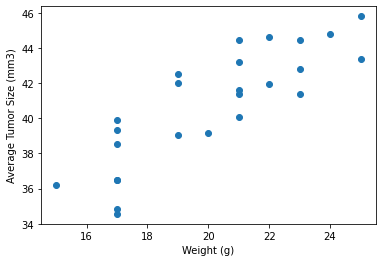

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

average_volume = capomulin_df.groupby(["Mouse ID"]).mean()
y_axis = average_volume["Tumor Volume (mm3)"]
x_axis = average_volume["Weight (g)"]

plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Size (mm3)")

plt.show()

The correlation coefficient between volume and weight is 0.84


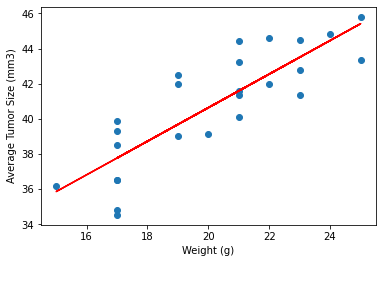

In [78]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(average_volume["Tumor Volume (mm3)"], average_volume["Weight (g)"])
print(f"The correlation coefficient between volume and weight is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, color="red")
plt.annotate(line_eq,(15,30), fontsize=15)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Size (mm3)")

plt.show()